In [1]:
## First we will import the libraries:

import pandas as pd # data manipulation and analysis.
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # plots visualizations
import seaborn as sns # HD plots graphics based on matplot
import scipy.stats as stats # statistical functions
from scipy.stats import norm # Specific method
from sklearn.preprocessing import StandardScaler # Standarize the data (normal distribution)
from sklearn.preprocessing import MinMaxScaler # Normalize the data
from sklearn import linear_model # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score # test the Machine Learning model
import warnings # Lastly... no more warnings... HURRAY !!!!
warnings.filterwarnings('ignore')

In [4]:
# Defining our functions:

def explore_data():
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)

def cc(): # cleaning columns
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()

In [3]:
##Read the data
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()
##data.sample(5) ##can be used for random sample

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
## Explore the data
 # Exploration allows for deeper understanding of a dataset, 
##making it easier to navigate and use the data later.
explore_data()

The dataframe shape is (9134, 24) .
 
The dataframe columns are:
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
 
The dataframe data types are:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                       

In [8]:
##Cleaning the data
cc()

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')



In [7]:
## To check the datatypes of all variables
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
## Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
##(we can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [16]:
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=np.number)
num.sample(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
2870,2496.766693,0,73,13,33,0,1,350.400000
2642,6326.679236,0,87,2,41,0,3,417.600000
7429,3589.372361,30944,92,15,46,0,1,348.216284
4689,4178.586494,62113,104,1,0,0,1,5.894778
5623,9029.940704,0,138,23,93,0,3,1376.958592
3254,5666.696280,48156,143,9,20,0,1,686.400000
4488,13989.846970,22354,118,27,9,0,2,775.526054
7455,11009.130490,51643,283,16,43,0,1,1358.400000
1548,8415.644389,0,62,8,98,0,2,446.400000
4583,8501.652884,0,136,20,98,3,6,979.200000


In [19]:
##Dealing with Nan values
num = data.select_dtypes(include= np.number).fillna(0) # Dealing  with NaN values
num.sample(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
8553,7465.980556,0,109,4,33,0,8,784.800000
8576,2914.094610,28523,77,15,12,0,1,369.600000
8184,12010.937260,0,119,3,24,0,2,856.800000
7644,2520.301352,56228,65,4,79,0,1,276.877348
141,5619.068508,50335,140,9,54,0,1,456.523850
4911,6862.866306,56779,86,21,16,0,3,435.388932
5107,4029.723325,93621,100,16,20,0,1,59.860273
3586,4755.762589,72193,118,1,46,0,1,552.646907
1157,13742.537240,90343,175,11,68,0,3,833.072722
6232,16468.220790,0,63,4,52,0,2,685.126940


In [17]:
categorical = ['object']
cat = data.select_dtypes(include=np.object)
cat.sample(10)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
2228,WB96917,California,No,Extended,College,1/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer4,Call Center,Two-Door Car,Medsize
310,FY56083,Oregon,No,Basic,Bachelor,2/13/11,Employed,M,Rural,Married,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Small
5597,MD70013,Nevada,No,Extended,Bachelor,2/5/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small
4591,LO57469,Oregon,No,Extended,High School or Below,1/23/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Medsize
457,TT82373,California,No,Extended,Bachelor,1/8/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Sports Car,Medsize
4053,HG23705,Arizona,No,Basic,Bachelor,1/5/11,Employed,F,Rural,Single,Personal Auto,Personal L3,Offer2,Agent,Four-Door Car,Medsize
2129,SE76116,California,No,Basic,Bachelor,1/29/11,Employed,M,Rural,Divorced,Personal Auto,Personal L2,Offer1,Branch,SUV,Medsize
6110,XT55646,Arizona,No,Basic,Bachelor,2/2/11,Medical Leave,M,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,SUV,Medsize
1086,GK72076,Washington,No,Premium,Bachelor,2/7/11,Employed,F,Suburban,Single,Personal Auto,Personal L3,Offer1,Branch,Four-Door Car,Small
2858,DQ93036,Arizona,No,Extended,High School or Below,1/11/11,Employed,M,Rural,Married,Personal Auto,Personal L1,Offer1,Branch,Four-Door Car,Medsize


In [20]:
##Dealing with NaN values for categorical
cat = data.select_dtypes(exclude=np.number).fillna("")

In [21]:
data.sample(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
3035,SD67101,Nevada,3600.934326,Yes,Basic,High School or Below,2/25/11,Retired,F,25147,...,54,0,1,Personal Auto,Personal L2,Offer1,Agent,694.598288,SUV,Medsize
4364,XR85926,Oregon,8012.365866,No,Basic,Bachelor,1/27/11,Employed,M,58058,...,49,0,2,Personal Auto,Personal L1,Offer2,Call Center,355.198918,Four-Door Car,Medsize
4346,KX32370,California,7078.948599,No,Extended,College,1/16/11,Employed,M,23222,...,66,0,4,Corporate Auto,Corporate L3,Offer3,Branch,252.938842,Two-Door Car,Large
4119,LM67096,Oregon,2127.923570,No,Basic,Bachelor,1/17/11,Unemployed,F,0,...,6,1,1,Corporate Auto,Corporate L2,Offer1,Web,31.481852,Four-Door Car,Medsize
4479,FP99321,Washington,2628.171324,No,Extended,High School or Below,2/9/11,Unemployed,M,0,...,73,4,1,Personal Auto,Personal L3,Offer1,Branch,640.800000,Four-Door Car,Small
7121,RO70057,Nevada,6369.262355,Yes,Extended,High School or Below,1/20/11,Employed,M,34498,...,72,0,7,Personal Auto,Personal L1,Offer2,Branch,398.400000,Two-Door Car,Small
4254,VU87728,Nevada,4846.322223,No,Basic,High School or Below,1/25/11,Unemployed,M,0,...,75,0,9,Personal Auto,Personal L2,Offer4,Agent,518.400000,Four-Door Car,Medsize
5709,JV38934,Washington,2254.402024,No,Basic,Bachelor,1/2/11,Unemployed,F,0,...,95,1,1,Personal Auto,Personal L3,Offer1,Branch,768.797656,Four-Door Car,Medsize
4783,DO31181,Oregon,4739.297046,No,Extended,College,1/30/11,Unemployed,F,0,...,55,5,3,Personal Auto,Personal L3,Offer1,Agent,38.792481,Two-Door Car,Medsize
7710,NI58226,Oregon,2752.655030,No,Basic,High School or Below,2/23/11,Employed,F,81280,...,47,0,1,Personal Auto,Personal L3,Offer3,Web,308.349562,Four-Door Car,Medsize


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


In [ ]:
##Now we will try to check the normality of the numerical variables visually
##Use seaborn library to construct distribution plots for the numerical variables
##Use Matplotlib to construct histograms
##Do the distributions for different numerical variables look like a normal distribution??##

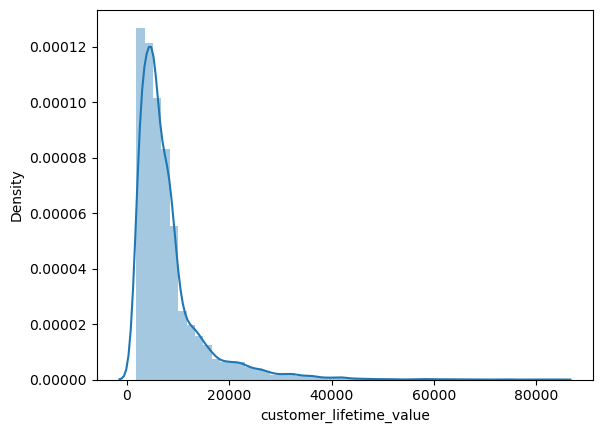

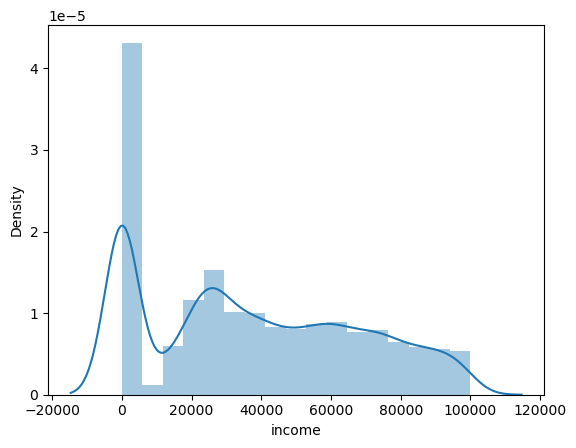

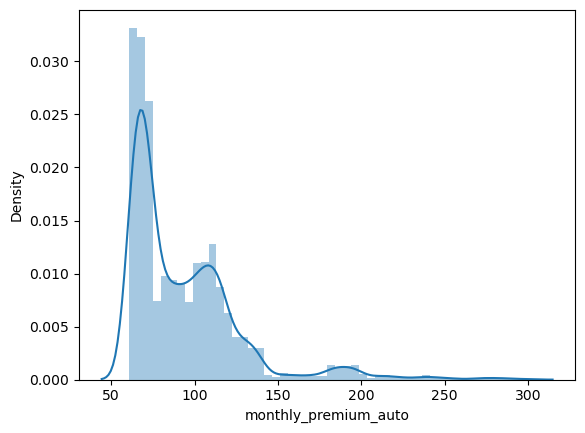

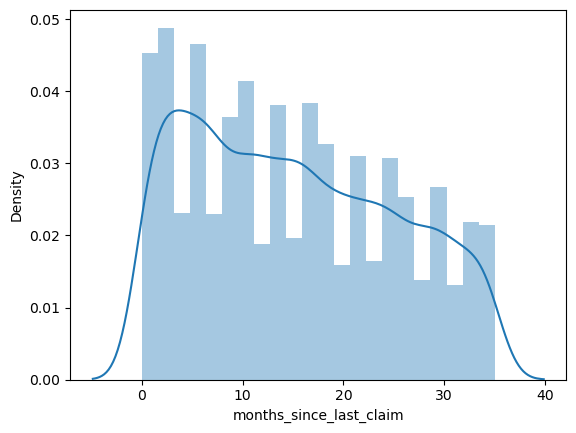

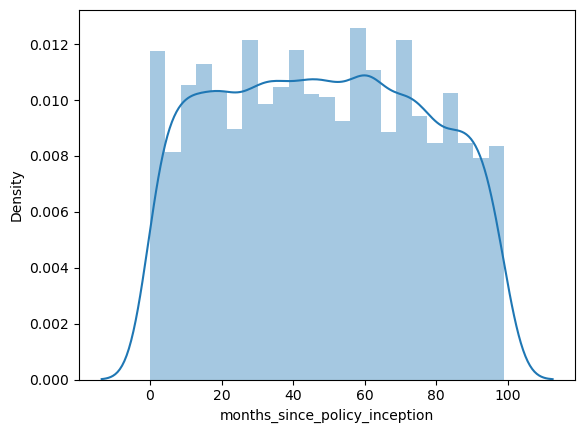

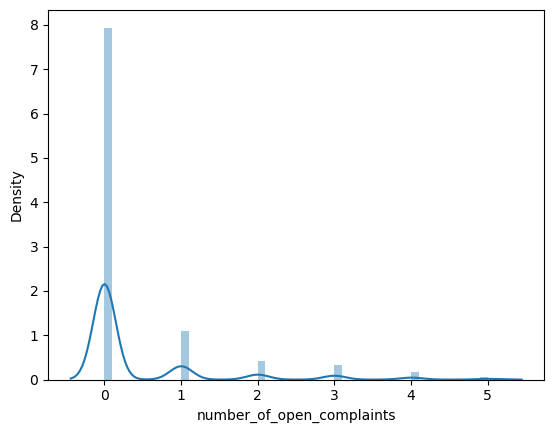

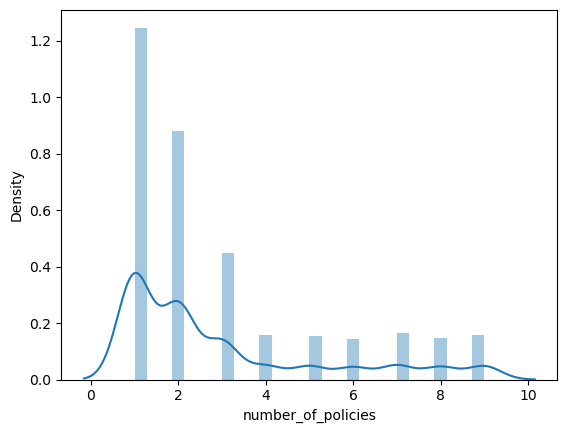

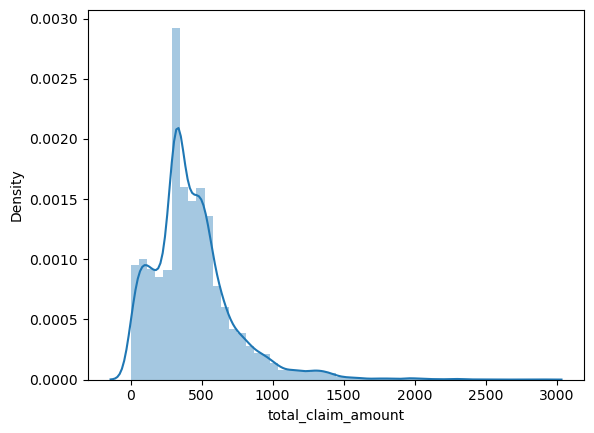

In [23]:
# Seaborn for distribution plots (only numerical)
for column in num:
    sns.distplot(num[column])
    plt.show()

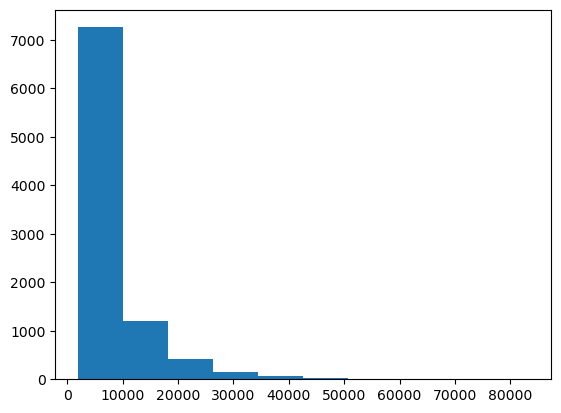

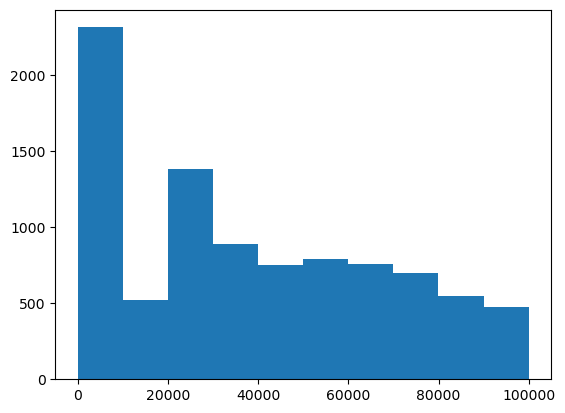

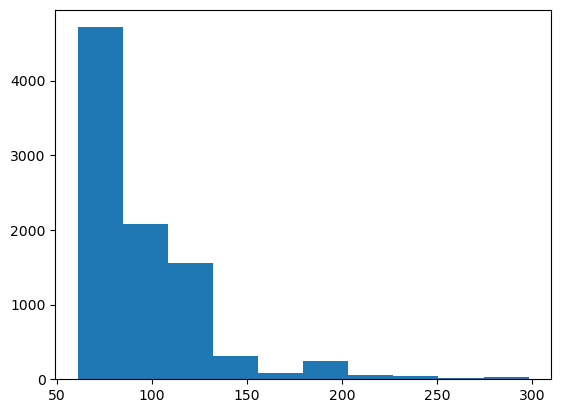

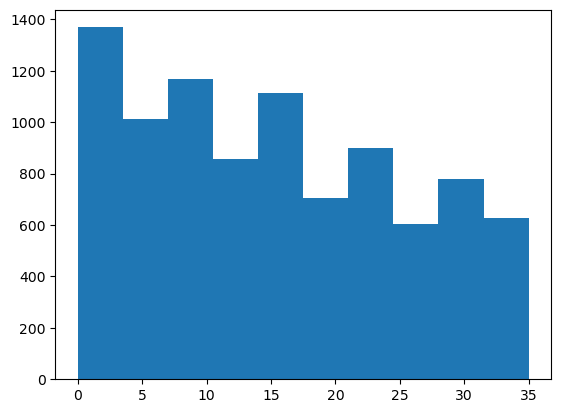

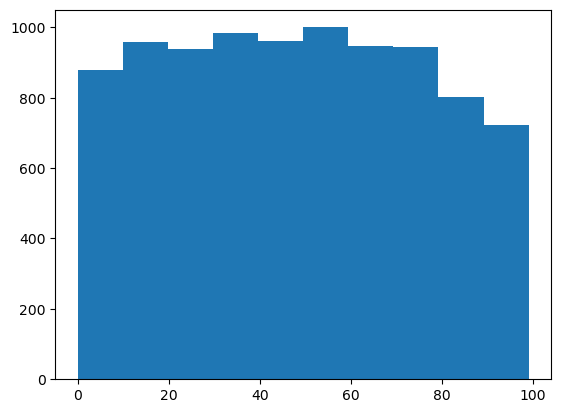

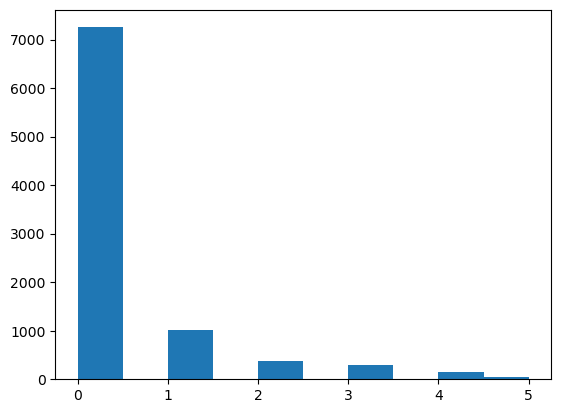

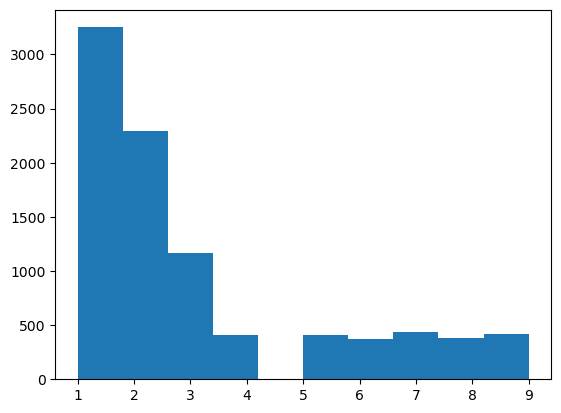

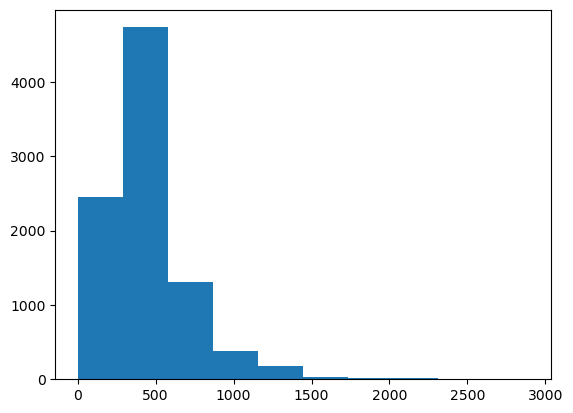

In [24]:
# Matplot for histograms
for column in num:
    plt.hist(num[column])
    plt.show()

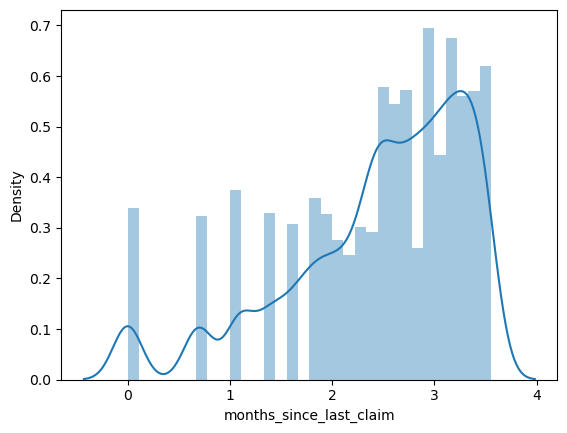

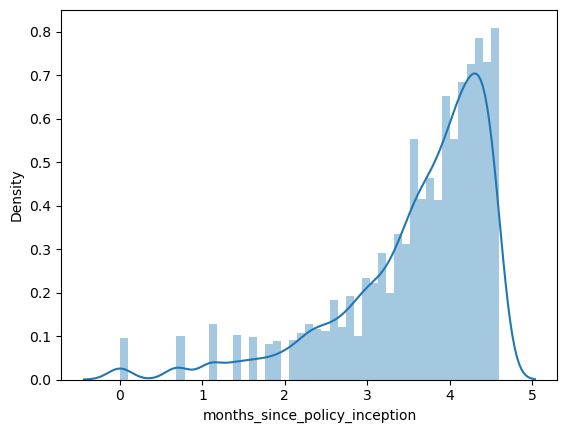

In [25]:
# Do the distributions for different numerical variables look like a normal distribution?

# here we can drop the columns that don't form a 'bell-shape"(which dont form normal distribution)
num_drop = num.drop(columns=['monthly_premium_auto', 'income', 'customer_lifetime_value', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'])

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

for column in num_drop:
    num_drop[column] = list(map(log_transfom_clean, num_drop[column]))
    num_drop[column] = num_drop[column].fillna(np.mean(num_drop[column]))
    sns.distplot(num_drop[column])
    plt.show()

In [ ]:
##For the numerical variables, check the multicollinearity between the features. 
Please note that we will use the column total_claim_amount later as the target variable.

In [ ]:
# Check the multicollinearity: Check the correlation between features so that we can remove them in future to avoid havoc in our model

In [34]:
##Plot the correlation matrix of numerical variables:
num.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396261,0.011517,0.009418,-0.036343,0.021955,0.226437
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355265
monthly_premium_auto,0.396261,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007565
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003328
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014240
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002341
total_claim_amount,0.226437,-0.355265,0.632017,0.007565,0.003328,-0.014240,-0.002341,1.000000


In [70]:
# use the round function for above data set:
num_corr = data.corr()
num_corr = round(data_corr,2)
num_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


<AxesSubplot:xlabel='income'>

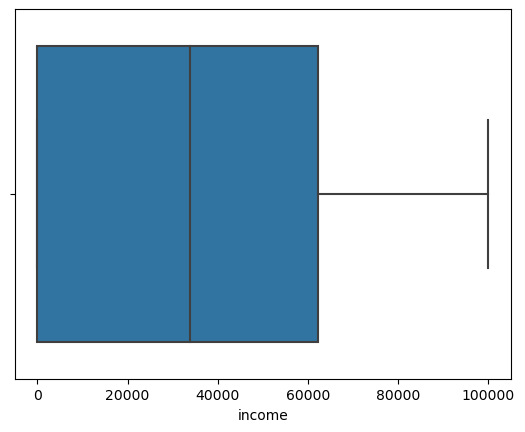

In [55]:
## I am doing it for one numerical columns to check the outliers for testing purpose
sns.boxplot(x=data['income'],whis=1.5) # whis is the parameter to choose your threshold, standard is 1.5

In [41]:
iqr = np.percentile(data['income'],75) - np.percentile(data['income'],25) # data['IC1'].quantile(0.75)
iqr

62320.0

In [42]:
np.percentile(data['income'],75)

62320.0

In [43]:
# define the limits
upper_limit = np.percentile(data['income'],75) + 5*iqr
lower_limit = np.percentile(data['income'],25) - 5*iqr
upper_limit, lower_limit

(373920.0, -311600.0)

In [44]:
data.shape

(9134, 24)

In [46]:
#how many rows are the outliers
len(data[(data['income']<lower_limit) & (data['income']>upper_limit)])

0

In [56]:
# remove them from the data
data = data[(data['income']>lower_limit) & (data['income']<upper_limit)]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2764.0,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,385.0,Two-Door Car,Medsize
1,QZ44356,Arizona,6980.0,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.0,Four-Door Car,Medsize
2,AI49188,Nevada,12887.0,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.0,Two-Door Car,Medsize
3,WW63253,California,7646.0,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,530.0,SUV,Medsize
4,HB64268,Washington,2814.0,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.0,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23406.0,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.0,Four-Door Car,Medsize
9130,PK87824,California,3097.0,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.0,Four-Door Car,Medsize
9131,TD14365,California,8164.0,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,791.0,Four-Door Car,Medsize
9132,UP19263,California,7524.0,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.0,Four-Door Car,Large


In [ ]:
##Drop one of the two features that show a high correlation between them (greater than 0.9). 
##Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that 
##have a high correlation, then do not drop any features##

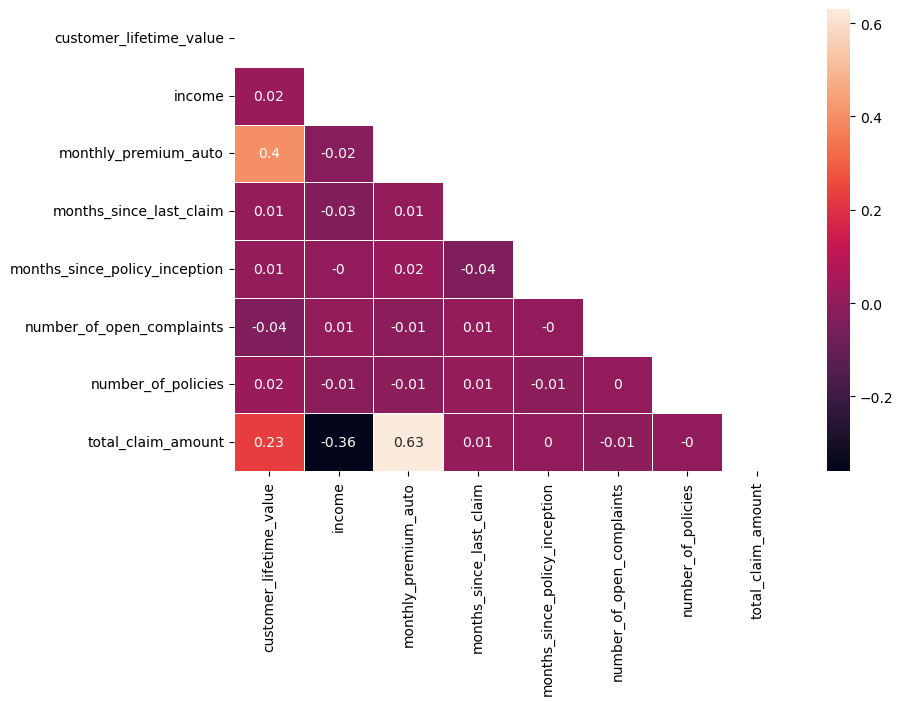

In [73]:
# How to plot seaborn heatmap
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(num_corr, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
cannot see any feature which have correlation higher than 0.9

In [85]:
# How to plot the correlation matrix
sns.set_theme(style="white")

# Compute the correlation matrix
corr = num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


TypeError: 'DataFrame' object is not callable